In [1]:
%pip install numpy pandas tensorflow matplotlib scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


2025-05-12 17:44:06.325807: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-12 17:44:06.365728: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 17:44:06.637463: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 17:44:06.829488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747061046.997748    5596 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747061047.04

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../dataset/elephant/eb32b60929f0093ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
../dataset/elephant/OIP-fWSM5Y363wguu8LnbdCI0wHaE8.jpeg
../dataset/elephant/OIP-jJDO330zT2MtAmfrbSecRgHaFj.jpeg
../dataset/elephant/OIP-1TODjko3QXADxLnPR6viRgHaEK.jpeg
../dataset/elephant/OIP-WgDGXWs8Q792l9klYY0OqgHaE8.jpeg
../dataset/elephant/OIP-huM2xTm6ZutPy-TCUYYAJAHaEK.jpeg
../dataset/elephant/eb3cb90b29f6043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
../dataset/elephant/OIP-pZTeF1ca-j7NwecmK-cEAAHaEs.jpeg
../dataset/elephant/OIP-obYH4keHsb_cG7kQQe0WNgHaD7.jpeg
../dataset/elephant/OIP-t-nJVWGZhEMb0rV4MJYYmgHaHa.jpeg
../dataset/elephant/OIP-qxTMeWFRwQwCJ_lgV8DTFgHaJI.jpeg
../dataset/elephant/OIP-AnAJWY_yPjeeh_es180YhgHaEp.jpeg
../dataset/elephant/OIP-ELR1K45tUYDDNwSr--n6uQHaFk.jpeg
../dataset/elephant/OIP-F09MNg2hcBkHAdZUPi0szAHaFj.jpeg
../dataset/elephant/OIP-wZXgkanUsl1q7Mzh0IliegHaEK.jpeg
../dataset/elephant/OIP-zwsmvOpywbUHPDIiA9vLBgHaEK.jpeg
../dataset/elephant/OIP-39Qt3k

In [4]:
# Set seed for reproducibility
tf.random.set_seed(42)

# Path to dataset
DATASET_PATH = '../dataset'  # <--- CHANGE THIS

# Image settings
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [5]:
# ========== Transfer Learning: Preprocessing ==========
tl_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

tl_train_gen = tl_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

tl_val_gen = tl_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [6]:
# ========== Transfer Learning Model (MobileNetV2) ==========
base_model = MobileNetV2(include_top=False, input_shape=(128, 128, 3), weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(tl_train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

E0000 00:00:1747061169.505876    5596 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747061169.519520    5596 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:

# ========== Train TL Model ==========
tl_history = model.fit(
    tl_train_gen,
    validation_data=tl_val_gen,
    epochs=10
)

/home/maher/ai_project/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 103s 151ms/step - accuracy: 0.8506 - loss: 0.4925 - val_accuracy: 0.9352 - val_loss: 0.1965
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 119s 182ms/step - accuracy: 0.9454 - loss: 0.1726 - val_accuracy: 0.9444 - val_loss: 0.1798
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 115s 178ms/step - accuracy: 0.9610 - loss: 0.1214 - val_accuracy: 0.9406 - val_loss: 0.2004
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 110s 167ms/step - accuracy: 0.9658 - loss: 0.0998 - val_accuracy: 0.9446 - val_loss: 0.1952
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 118s 179ms/step - accuracy: 0.9723 - loss: 0.0823 - val_accuracy: 0.9450 - val_loss: 0.1991
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 112s 172ms/step - accuracy: 0.9767 - loss: 0.0675 - val_accuracy: 0.9404 - val_loss: 0.2287
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 107s 164ms/step - accuracy: 0.9827 - loss: 0.0527 - val_accuracy: 0.9390 - val_loss: 0.2450
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 110s 168ms/step - accuracy: 0.9835 -

In [8]:
# ========== Save Models ==========
model.save('../model/tl_model.h5')

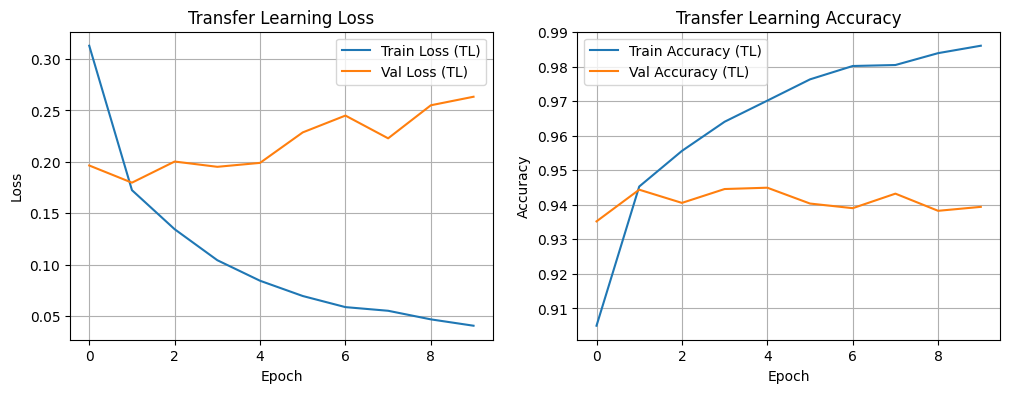

In [9]:
# ========== Plot TL Accuracy and Loss ==========
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(tl_history.history['loss'], label='Train Loss (TL)')
plt.plot(tl_history.history['val_loss'], label='Val Loss (TL)')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(tl_history.history['accuracy'], label='Train Accuracy (TL)')
plt.plot(tl_history.history['val_accuracy'], label='Val Accuracy (TL)')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

164/164 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step


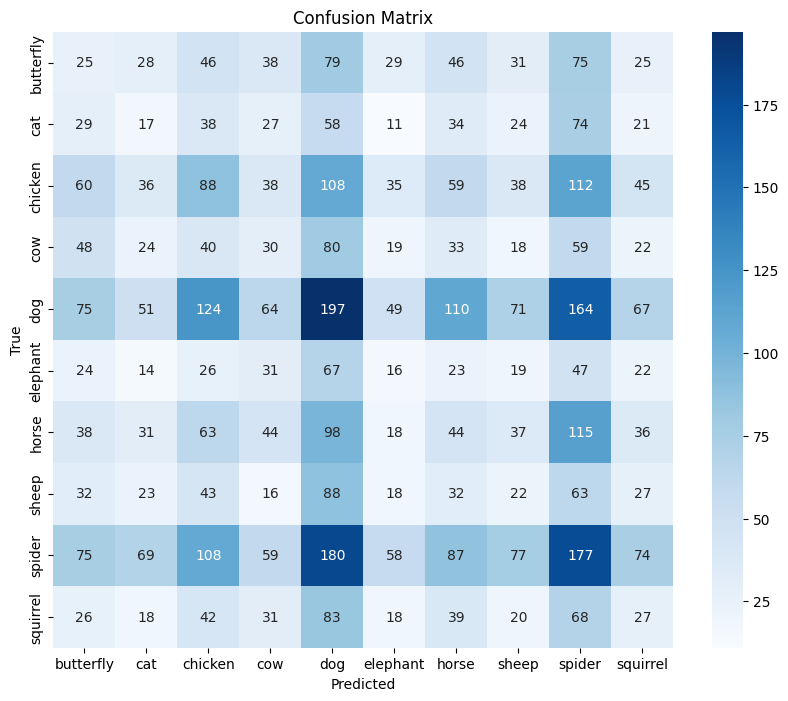

Classification Report:

              precision    recall  f1-score   support

   butterfly       0.06      0.06      0.06       422
         cat       0.05      0.05      0.05       333
     chicken       0.14      0.14      0.14       619
         cow       0.08      0.08      0.08       373
         dog       0.19      0.20      0.20       972
    elephant       0.06      0.06      0.06       289
       horse       0.09      0.08      0.09       524
       sheep       0.06      0.06      0.06       364
      spider       0.19      0.18      0.18       964
    squirrel       0.07      0.07      0.07       372

    accuracy                           0.12      5232
   macro avg       0.10      0.10      0.10      5232
weighted avg       0.12      0.12      0.12      5232

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [10]:
# Generate predictions for the validation set
val_steps = tl_val_gen.samples // tl_val_gen.batch_size
pred_probs = model.predict(tl_val_gen, steps=val_steps + 1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = tl_val_gen.classes[:len(y_pred)]

# Get class labels
class_labels = list(tl_val_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Show some sample predictions
import random

# Get a batch of validation data
x_batch, y_batch = next(tl_val_gen)
y_batch_true = np.argmax(y_batch, axis=1)
y_batch_pred = np.argmax(model.predict(x_batch), axis=1)

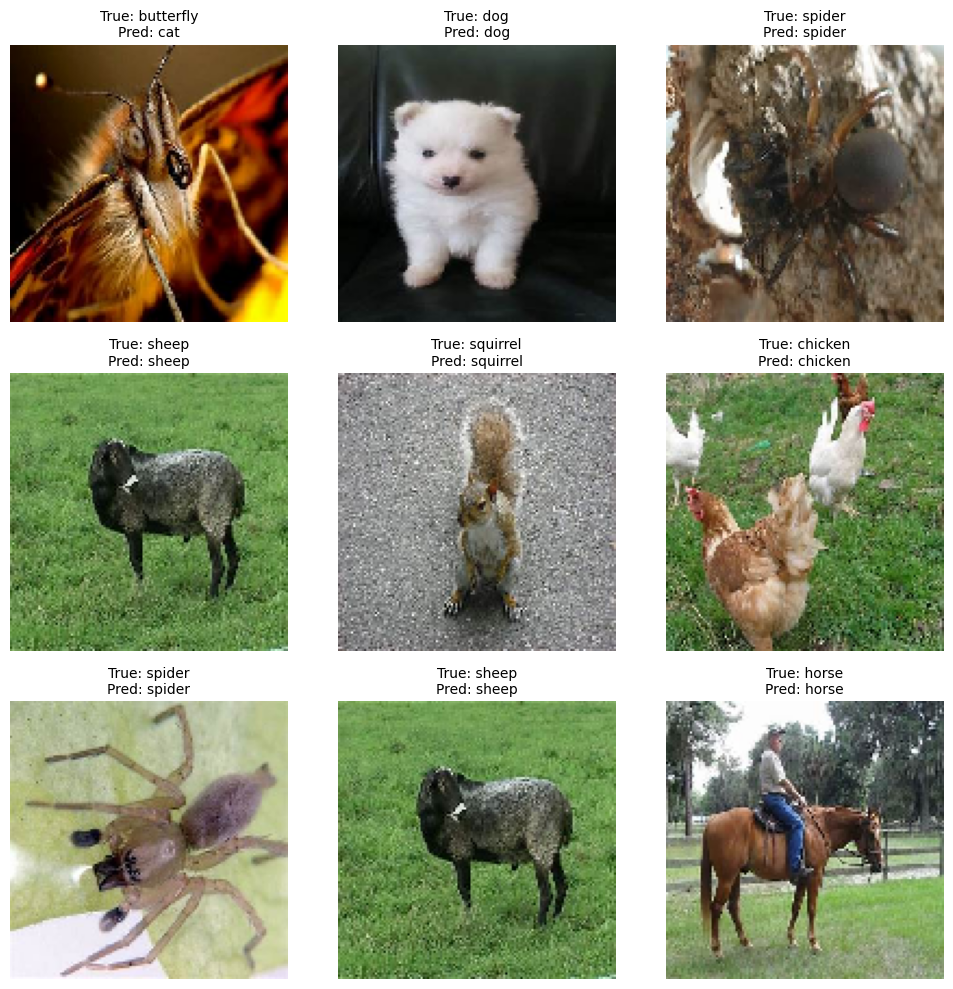

In [12]:
import numpy as np

# Function to reverse MobileNetV2 preprocessing
def deprocess_image(img):
    img = img.copy()
    img += 1.
    img *= 127.5
    return np.clip(img, 0, 255).astype('uint8')

# Display random 9 predictions with proper color
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, len(x_batch) - 1)
    plt.subplot(3, 3, i + 1)
    img = deprocess_image(x_batch[idx])  # Fix color
    plt.imshow(img)
    plt.title(f"True: {class_labels[y_batch_true[idx]]}\nPred: {class_labels[y_batch_pred[idx]]}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

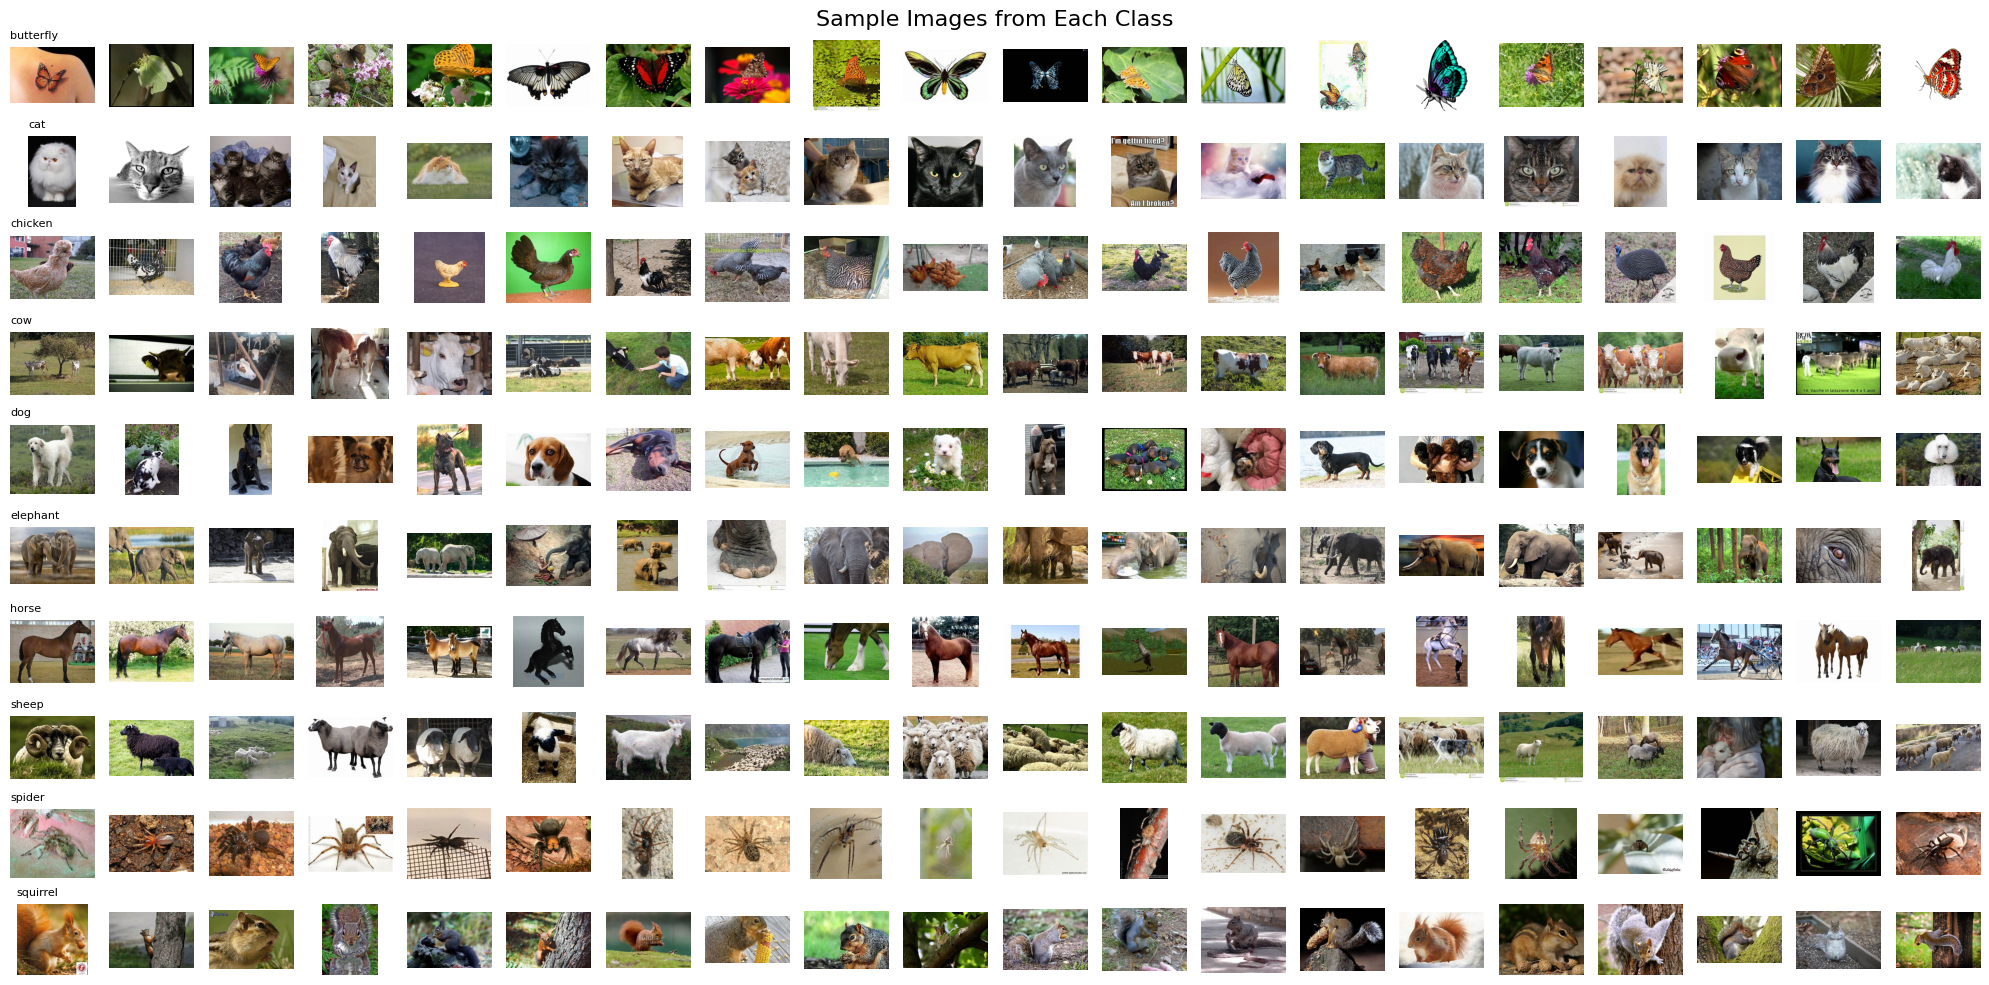

In [14]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Path to dataset folder
dataset_path = "../dataset"  # Adjust as needed

# Parameters
images_per_class = 20  # Number of images to show per class
img_size = (14, 14)     # Resize to this if needed

# Get class folders
class_names = sorted(os.listdir(dataset_path))

# Set up plot
fig, axs = plt.subplots(len(class_names), images_per_class, figsize=(images_per_class, len(class_names)))
fig.suptitle("Sample Images from Each Class", fontsize=16)

# Plot images
for i, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    sample_files = random.sample(image_files, min(images_per_class, len(image_files)))
    
    for j in range(images_per_class):
        ax = axs[i, j] if len(class_names) > 1 else axs[j]
        if j < len(sample_files):
            img = mpimg.imread(os.path.join(class_path, sample_files[j]))
            ax.imshow(img, cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_title(class_name, fontsize=8, loc='left')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
